In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [90]:
data=pd.read_csv("bank-full.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [91]:
data.shape

(45211, 17)

## EDA

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [93]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [94]:
data[data.isna()].sum()

age          0.0
job            0
marital        0
education      0
default        0
balance      0.0
housing        0
loan           0
contact        0
day          0.0
month          0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome       0
Target         0
dtype: object

In [95]:
data[data.duplicated()].shape

(0, 17)

In [96]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:>

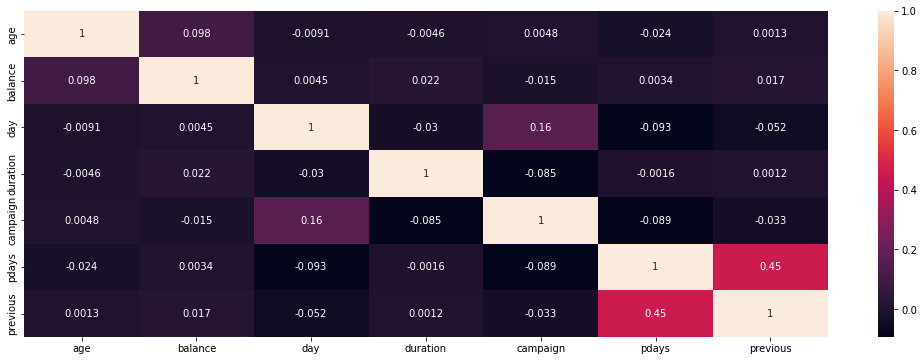

In [97]:
import seaborn as sns
fig= plt.figure(figsize=(18, 6))
sns.heatmap(data=data.corr(),annot=True)

In [98]:
# One-Hot Encoding of categrical variables
data1=pd.get_dummies(data,columns=['job','marital','education','contact','poutcome','default','housing','loan'])
data1

,age,balance,day,month,duration,campaign,pdays,previous,Target,job_admin.,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,2143,5,may,261,1,-1,0,no,0,...,0,0,0,1,1,0,0,1,1,0
1,44,29,5,may,151,1,-1,0,no,0,...,0,0,0,1,1,0,0,1,1,0
2,33,2,5,may,76,1,-1,0,no,0,...,0,0,0,1,1,0,0,1,0,1
3,47,1506,5,may,92,1,-1,0,no,0,...,0,0,0,1,1,0,0,1,1,0
4,33,1,5,may,198,1,-1,0,no,0,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,nov,977,3,-1,0,yes,0,...,0,0,0,1,1,0,1,0,1,0
45207,71,1729,17,nov,456,2,-1,0,yes,0,...,0,0,0,1,1,0,1,0,1,0
45208,72,5715,17,nov,1127,5,184,3,yes,0,...,0,0,1,0,1,0,1,0,1,0
45209,57,668,17,nov,508,4,-1,0,no,0,...,0,0,0,1,1,0,1,0,1,0


In [99]:
data1['y'] = np.where(data1['Target'].str.contains("yes"), 1, 0)
data1

,age,balance,day,month,duration,campaign,pdays,previous,Target,job_admin.,...,poutcome_other,poutcome_success,poutcome_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y
0,58,2143,5,may,261,1,-1,0,no,0,...,0,0,1,1,0,0,1,1,0,0
1,44,29,5,may,151,1,-1,0,no,0,...,0,0,1,1,0,0,1,1,0,0
2,33,2,5,may,76,1,-1,0,no,0,...,0,0,1,1,0,0,1,0,1,0
3,47,1506,5,may,92,1,-1,0,no,0,...,0,0,1,1,0,0,1,1,0,0
4,33,1,5,may,198,1,-1,0,no,0,...,0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,nov,977,3,-1,0,yes,0,...,0,0,1,1,0,1,0,1,0,1
45207,71,1729,17,nov,456,2,-1,0,yes,0,...,0,0,1,1,0,1,0,1,0,1
45208,72,5715,17,nov,1127,5,184,3,yes,0,...,0,1,0,1,0,1,0,1,0,1
45209,57,668,17,nov,508,4,-1,0,no,0,...,0,0,1,1,0,1,0,1,0,0


In [100]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   balance              45211 non-null  int64 
 2   day                  45211 non-null  int64 
 3   month                45211 non-null  object
 4   duration             45211 non-null  int64 
 5   campaign             45211 non-null  int64 
 6   pdays                45211 non-null  int64 
 7   previous             45211 non-null  int64 
 8   Target               45211 non-null  object
 9   job_admin.           45211 non-null  uint8 
 10  job_blue-collar      45211 non-null  uint8 
 11  job_entrepreneur     45211 non-null  uint8 
 12  job_housemaid        45211 non-null  uint8 
 13  job_management       45211 non-null  uint8 
 14  job_retired          45211 non-null  uint8 
 15  job_self-employed    45211 non-null  uint8 
 16  job_

In [101]:
#  Changing Months into Int
data1['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [102]:
month={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [103]:
data1=data1.replace(month)
data1

,age,balance,day,month,duration,campaign,pdays,previous,Target,job_admin.,...,poutcome_other,poutcome_success,poutcome_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y
0,58,2143,5,5,261,1,-1,0,no,0,...,0,0,1,1,0,0,1,1,0,0
1,44,29,5,5,151,1,-1,0,no,0,...,0,0,1,1,0,0,1,1,0,0
2,33,2,5,5,76,1,-1,0,no,0,...,0,0,1,1,0,0,1,0,1,0
3,47,1506,5,5,92,1,-1,0,no,0,...,0,0,1,1,0,0,1,1,0,0
4,33,1,5,5,198,1,-1,0,no,0,...,0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,11,977,3,-1,0,yes,0,...,0,0,1,1,0,1,0,1,0,1
45207,71,1729,17,11,456,2,-1,0,yes,0,...,0,0,1,1,0,1,0,1,0,1
45208,72,5715,17,11,1127,5,184,3,yes,0,...,0,1,0,1,0,1,0,1,0,1
45209,57,668,17,11,508,4,-1,0,no,0,...,0,0,1,1,0,1,0,1,0,0


In [104]:
data2=data1.drop("Target",axis=1)

In [105]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   month                45211 non-null  int64
 4   duration             45211 non-null  int64
 5   campaign             45211 non-null  int64
 6   pdays                45211 non-null  int64
 7   previous             45211 non-null  int64
 8   job_admin.           45211 non-null  uint8
 9   job_blue-collar      45211 non-null  uint8
 10  job_entrepreneur     45211 non-null  uint8
 11  job_housemaid        45211 non-null  uint8
 12  job_management       45211 non-null  uint8
 13  job_retired          45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  job_services         45211 non-null  uint8
 16  job_student          4

# Model Building

In [107]:
x=data2.iloc[:,:39]
y=data2.iloc[:,40]

In [108]:
x

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_no,default_yes,housing_no,housing_yes,loan_no
0,58,2143,5,5,261,1,-1,0,0,0,...,1,0,0,0,1,1,0,0,1,1
1,44,29,5,5,151,1,-1,0,0,0,...,1,0,0,0,1,1,0,0,1,1
2,33,2,5,5,76,1,-1,0,0,0,...,1,0,0,0,1,1,0,0,1,0
3,47,1506,5,5,92,1,-1,0,0,1,...,1,0,0,0,1,1,0,0,1,1
4,33,1,5,5,198,1,-1,0,0,0,...,1,0,0,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,11,977,3,-1,0,0,0,...,0,0,0,0,1,1,0,1,0,1
45207,71,1729,17,11,456,2,-1,0,0,0,...,0,0,0,0,1,1,0,1,0,1
45208,72,5715,17,11,1127,5,184,3,0,0,...,0,0,0,1,0,1,0,1,0,1
45209,57,668,17,11,508,4,-1,0,0,1,...,0,0,0,0,1,1,0,1,0,1


In [109]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [118]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

# Model Predictions


In [111]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [112]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [42]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)


[[39118   804]
 [ 4217  1072]]


In [114]:
# The model accuracy
(39107+1282)/(39107+815+4007+1282)

0.8933445400455642

In [115]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     39922
           1       0.57      0.27      0.36      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.62      0.65     45211
weighted avg       0.87      0.89      0.87     45211



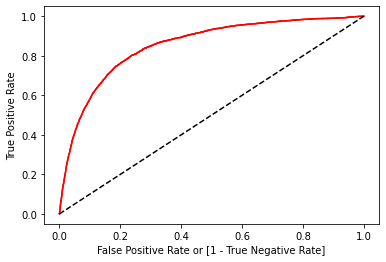

auc accuracy: 0.6194956488654484


In [116]:
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)